<p style="text-align: center;"> <span style="color:firebrick"> <font size="5"> <b> USC Marshall School of Business </b> </font> </p> </span> 

<p style="text-align: center;"> <b> <font font size="5"> DSO 545- Homework 3 </p> </b></font>

<p style="text-align: center;"> <b> Fall 2020 </b> </p>


## <span style="color:blue">  REPLACE THIS TEXT WITH YOUR NAME </span>

## <span style="color:firebrick">  Assignment Learning Objectives </span>

- Read JSON data into `Python`
- Slice, aggregrate, and filter data using `pandas`
- Perform univariate, bivariate, and multivariate EDA


## <span style="color:firebrick"> Assignment Description </span>

### Bank Customer Churn

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers. Banks, telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. (https://en.wikipedia.org/wiki/Customer_attrition)

You work at a multinational bank that is aiming to increase it's market share in Europe. Recently, it has been noticed that the number of customers using the banking services has declined, and the bank is worried that existing customers have stopped using them as their main bank. As a data scientist, you are tasked with finding out the reasons behind customer churn and to predict customer churn. The marketing team, in particular, is interested in your findings and want to better understand what are the potential reasons that they are having this decline in their customers. Your results will help the marketing team to use their budget wisely to target potential churners.

## <span style="color:firebrick"> Dataset </span>

The dataset consists of 12 variables, and it is available on Kaggle.

**Source**: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

    
|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`CustomerId`| customer's identification number
|`CredRate`| A credit score is a number between 300–850 that depicts a consumer's creditworthiness. The higher the score, the better a borrower looks to potential lenders.
|`Geography`| the regional bank has customers from three countries: France, Germany and Spain
|`Gender` | customer's gender
|`Age`| customer's age
|`Tenure`| years that the customer has stayed with the bank
|`Balance` | the amount of money available for withdrawal (\$)
|`Product Num`| number of products/services that the customers use in the bank
|`HasCrCard`| 1 indicates that the customer has a credit card, 0 otherwise
|`ActMem`| 1 indicates that the customer is an active member and using the bank's products and services and 0, otherwise
|`EstimatedSalary`| customer’s self-reported annual salary (\$)
|`Exited`| whether the customer has churned (closed the bank account), 1 indicates churn.



## <span style="color:firebrick"> Questions </span>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

churn = pd.read_json('bank.json')
churn.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


### Technical Questions

#### 1. What is the number of French, Spanish, and German customers in our dataset?

In [29]:
churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

#### 2. What is the percentage of customers who churned?

In [28]:
churn[churn['Exited'] == 1].shape[0]/churn.shape[0]

# OR
churn['Exited'].mean()


0.2037

#### 3. What is the percentage of customers who churned in the French branch? Round your answer to 2 decimal digits (search online on how to round values in Python)

In [37]:
french_churn = churn.loc[(churn['Geography'] == 'France') & 
                         (churn['Exited'] == 1)].shape[0]
french = churn.loc[churn['Geography'] == 'France'].shape[0]

round((french_churn / french)*100, 2)

16.15

#### 4. What is the average age of the bank customers in France? Round your answer to the nearest integer value. 

In [35]:
round(churn.loc[churn['Geography'] == 'France', 'Age'].mean())

39

#### 5. What is the average credit score for male Spanish customers who have been with the bank for 5 years or more? Round your answer to the nearest integer value. 

In [36]:
round(churn.loc[(churn['Geography'] == 'Spain') & 
                (churn['Gender'] == 'Male') & 
                (churn['Tenure'] >= 5), 'CredRate'].mean())

652

#### 6. In machine learning, we usually split our dataset into testing and training data. We usually use the training dataset to train and build our predictive model, and we use the testing dataset to check the accuracy of our model.

- Use the first 8000 observations to create the `churn_training` dataset (excluding the `Exited` variable), and the remaining 2000 observations to be the testing data `churn_testing` (excluding the `Exited` variable). 


In [20]:
churn_training = churn.iloc[0:8000, 0:11]
churn_testing = churn.iloc[8000:10000, 0:11]

### EDA Quesions

In [2]:
# numerical variables
#--------------------
# - CredRate 
# - Age
# - Tenure
# - Balance
# - EstimatedSalary


# categorical variables
#----------------------
# - Geography
# - Gender
# - Prod Number
# - HasCrCard
# - ActMem
# - Exited


#### 7. Use boxplots to perform univariate EDA for all numerical variables in the dataset.

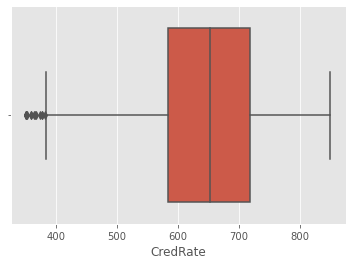

In [5]:
# 50% of the bank's customer has a credit score higher than 650 (approximately)
# 25% of the bank's customer has credit score less than 580
# 25% of the bank's cumtomer has credit score more than 710
# the lowest credit score is less than 400
# the highest credit score is around 850
# 50% of the bank's customer have credit scores between 580 and 720

sns.boxplot(data = churn, 
        x = 'CredRate')

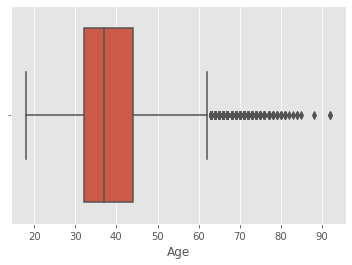

In [6]:
# do a similar analysis as we did for CredRate variable

sns.boxplot(data = churn, 
        x = 'Age')

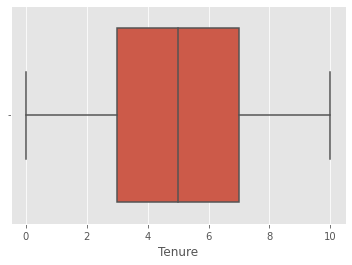

In [7]:
# do a similar analysis as we did for CredRate variable

sns.boxplot(data = churn, 
        x = 'Tenure')

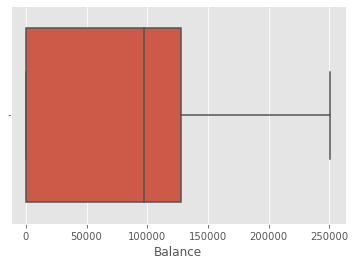

In [8]:
# do a similar analysis as we did for CredRate variable

sns.boxplot(data = churn, 
        x = 'Balance')

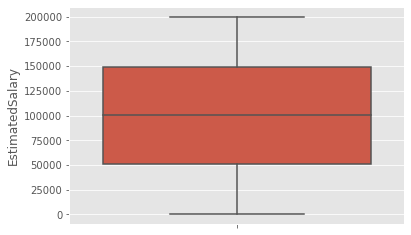

In [11]:
# do a similar analysis as we did for CredRate variable

sns.boxplot(data = churn, 
        y = 'EstimatedSalary')

#### 8. Use count plots to perform univariate EDA for all categorical variables in the dataset.

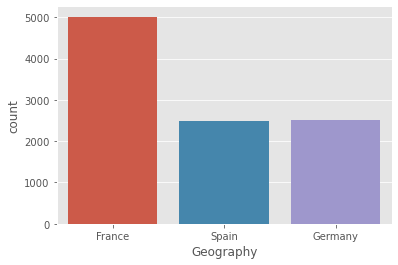

In [15]:
# half of the bank's customer are in France
# 1/4 are from Spain, and 1/4 are from Germany 

sns.countplot(data = churn, 
              x = 'Geography')

In [25]:
(churn['Geography'].value_counts()/churn.shape[0])*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

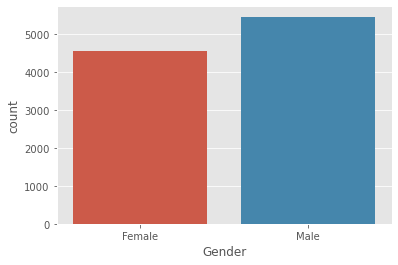

In [16]:
# 55% are males, 45% female customers

sns.countplot(data = churn, 
              x = 'Gender')

In [26]:
(churn['Gender'].value_counts()/churn.shape[0])*100

Male      54.53
Female    45.43
Name: Gender, dtype: float64

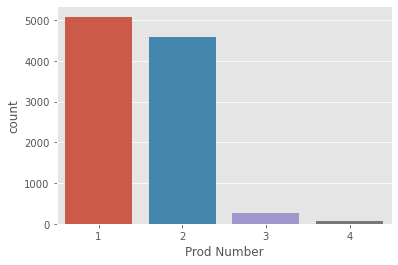

In [18]:
# most of the products/services used are 1 and 2. 

sns.countplot(data = churn, 
              x = 'Prod Number')

In [27]:
(churn['Prod Number'].value_counts()/churn.shape[0])*100

1    50.84
2    45.90
3     2.66
4     0.60
Name: Prod Number, dtype: float64

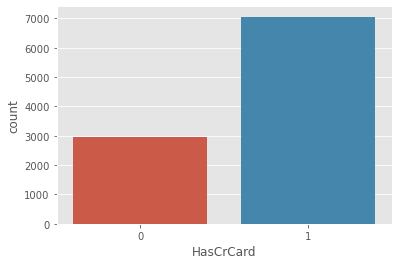

In [29]:
# 70% has credit card, and 30% did not have
sns.countplot(data = churn, 
              x = 'HasCrCard')

In [28]:
(churn['HasCrCard'].value_counts()/churn.shape[0])*100

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

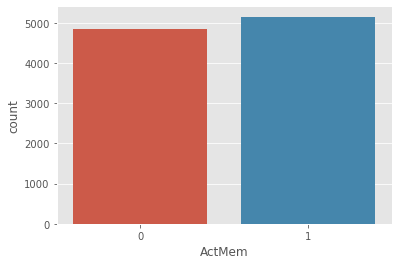

In [20]:
# 1/2 of the bank's customers are active and use it's products/services

sns.countplot(data = churn, 
              x = 'ActMem')

In [30]:
(churn['ActMem'].value_counts()/churn.shape[0])*100

1    51.51
0    48.49
Name: ActMem, dtype: float64

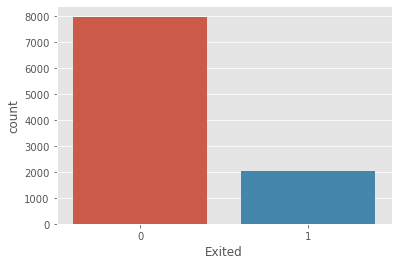

In [21]:
# one out of 5 customers churn 

sns.countplot(data = churn, 
              x = 'Exited')

In [31]:
(churn['Exited'].value_counts()/churn.shape[0])*100

0    79.63
1    20.37
Name: Exited, dtype: float64

#### 9. Use bivariate visual EDA (boxplots) to see if there is any relationship between customer churn and all numerical variables.

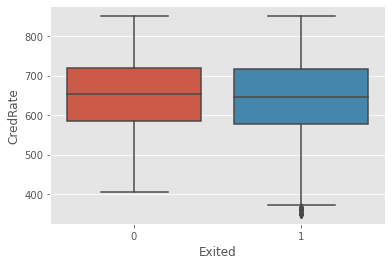

In [33]:
# There seems to be no relationship between customer churn and the credit score of customers
# this is because both distributions of credit rates are similar (also similar median values)

sns.boxplot(data = churn, 
            x = 'Exited',
            y = 'CredRate')

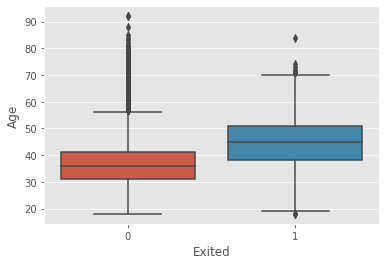

In [38]:
# In general, those churned customers seems to have higher age (on average) compared to non-churned, but that
# does not necassary mean that older customers tend to churn. (Correlation is not causation)

sns.boxplot(data = churn, 
            x = 'Exited',
            y = 'Age')

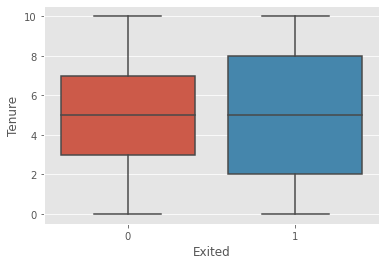

In [39]:
# tenure does not seem to have any effect on churn status for customers

sns.boxplot(data = churn, 
            x = 'Exited',
            y = 'Tenure')

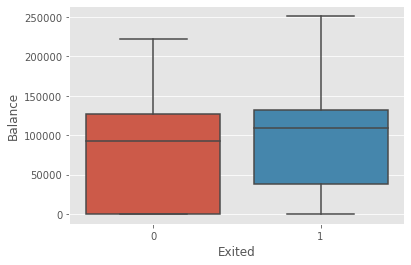

In [36]:
# In general, those churned customers seems to have higher balance (on average) compared to non-churned, but that
# does not necassary mean that customers with larger balanvce tend to churn. (Correlation is not causation)

sns.boxplot(data = churn, 
            x = 'Exited',
            y = 'Balance')

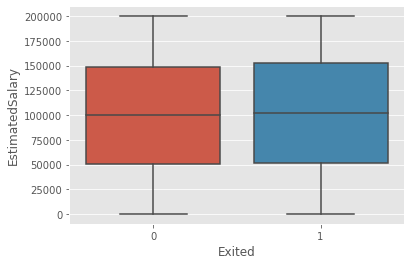

In [37]:
# there seem to be no correlation between salary and churn status

sns.boxplot(data = churn, 
            x = 'Exited',
            y = 'EstimatedSalary')

#### 10. Use bivariate visual EDA (heatmaps) to see if there is any relationship between customer churn and all categorical variables.

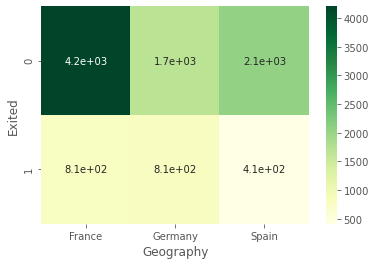

In [42]:
# it seems that most of the churned customers are from France

heatmapData = pd.crosstab(churn['Exited'], churn['Geography'])
sns.heatmap(heatmapData, 
           annot = True, 
           cmap = "YlGn")

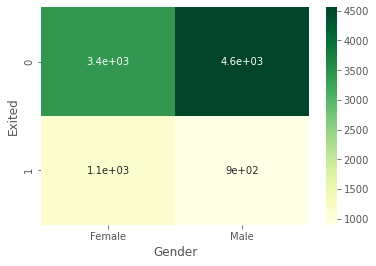

In [43]:
# most of the churned customers are males

heatmapData = pd.crosstab(churn['Exited'], churn['Gender'])
sns.heatmap(heatmapData, 
           annot = True, 
           cmap = "YlGn")

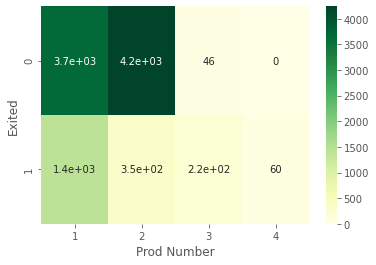

In [44]:
# most of the churned customers use mostly service/product #2

heatmapData = pd.crosstab(churn['Exited'], churn['Prod Number'])
sns.heatmap(heatmapData, 
           annot = True, 
           cmap = "YlGn")

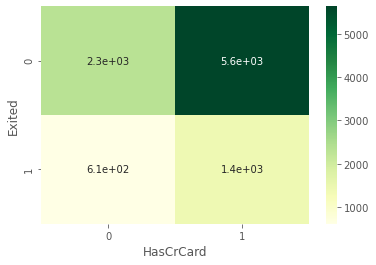

In [45]:
# most of the churned customers has a credit card

heatmapData = pd.crosstab(churn['Exited'], churn['HasCrCard'])
sns.heatmap(heatmapData, 
           annot = True, 
           cmap = "YlGn")

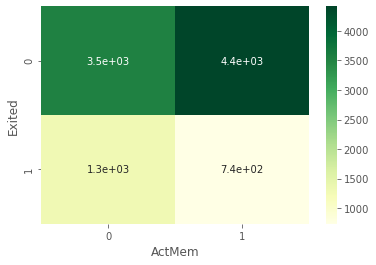

In [47]:
# most of the churned customers are active members (used the bank's services/products)

heatmapData = pd.crosstab(churn['Exited'], churn['ActMem'])
sns.heatmap(heatmapData, 
           annot = True, 
           cmap = "YlGn")

#### 11. Use a facet grid plot to show the the relationship among any 3 variables in our dataset.

/Users/abbass/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


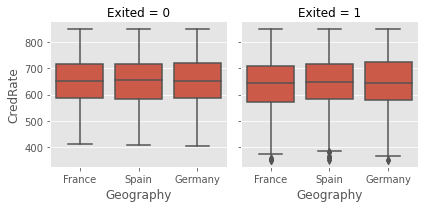

In [53]:
g = sns.FacetGrid(churn, col="Exited")
g.map(sns.boxplot,  "Geography", "CredRate")

## <span style="color:firebrick"> Grading & Expectations </span>


- The total number of points for this homework is 10 points
- Use this Jupyter Notebook as a template and add your answers to it
- Upload your answers back to blackboard

**Rubrics**


|**Grade**    |**Expectation**|
|:------------|:--------------|
|**100% of the allocated points**       | complete code and correct interpretation of the graphs
|**75% of the allocated points** |   complete code and no interpretation of the graphs 
|**50% or below** | partial numerical and visual analysis for variables with no facts